## Fraud detection using principal component analysis

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = r'/content/drive/MyDrive/AI_ML_Databricks/creditcard.csv'
#df_demo = pd.read_csv(demo_data)
df = pd.read_csv(data)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Separate the samples by class
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Drop the "Time" and "Class" columns
legit = legit.drop(['Time', 'Class'], axis=1)
fraud = fraud.drop(['Time', 'Class'], axis=1)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

In [9]:
legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

In [10]:
legit_restored.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.357057,-0.076245,2.542857,1.374064,-0.334125,0.464158,0.249411,0.096994,0.368645,0.101720,...,0.250354,-0.020210,0.277119,-0.110695,0.067183,0.128242,-0.190194,0.127194,0.000495,149.619994
1,1.191036,0.267127,0.164554,0.449360,0.058749,-0.082857,-0.081641,0.085590,-0.256856,-0.170192,...,-0.068677,-0.225217,-0.638472,0.101288,-0.339916,0.167194,0.126204,-0.006986,-0.002475,2.690002
2,-1.327410,-1.263805,1.813849,0.358643,-0.428852,1.761153,0.718305,0.268005,-1.499822,0.241764,...,0.395898,0.202265,0.798263,0.968588,-0.691820,-0.291949,-0.137268,-0.118974,-0.000719,378.660942
3,-0.956629,-0.166905,1.807220,-0.871085,0.011557,1.237773,0.223527,0.381890,-1.380514,-0.040096,...,-0.242442,-0.121583,0.011939,-0.175101,-1.176081,0.656263,-0.222074,0.043355,-0.002373,123.500246
4,-1.138990,0.911412,1.577935,0.386835,-0.364254,0.078606,0.569434,-0.262639,0.831722,0.784946,...,0.343081,-0.035513,0.810740,-0.108925,0.140422,-0.189637,0.501601,0.181414,0.001252,69.990467


In [13]:
legit_restored.shape, fraud_restored.shape

((284315, 29), (492, 29))

In [14]:
import numpy as np

def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

In [15]:
legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

In [16]:
print(legit_scores)
print(fraud_scores)

0         0.002307
1         0.000454
2         0.056114
3         0.008700
4         0.064392
            ...   
284802    2.867055
284803    0.018819
284804    0.001298
284805    0.015464
284806    0.049737
Length: 284315, dtype: float64
541        62.588903
623         0.008334
4920       65.396552
6108      450.205708
6329        0.212843
             ...    
279863    141.939428
280143     73.418073
280149     74.511754
281144    142.214859
281674      0.006439
Length: 492, dtype: float64


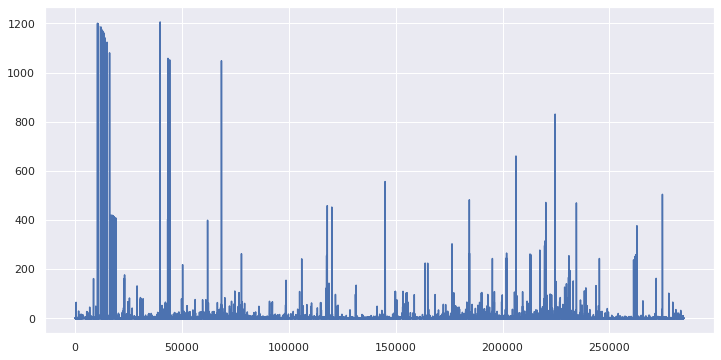

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

legit_scores.plot(figsize = (12, 6))

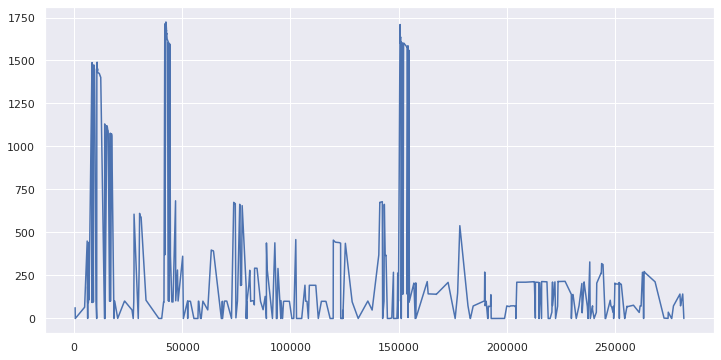

In [18]:
fraud_scores.plot(figsize = (12, 6))

Text(89.18, 0.5, 'True label')

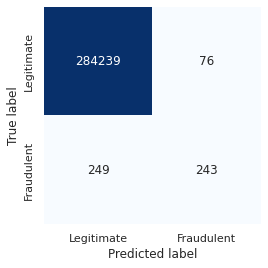

In [19]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')

## https://github.com/jeffprosise/Machine-Learning/blob/master/Fraud%20Detection%20(Unsupervised).ipynb

https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset

https://github.com/jeffprosise/Machine-Learning/blob/master/Anomaly%20Detection%20(PCA).ipynb

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
